In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-survey/df.csv


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [21]:
df=pd.read_csv('/kaggle/input/cleaned-survey/df.csv')
print(df.shape)
print(df.describe())
df.info()

(1243, 30)
               Age  self_employed  family_history    treatment  \
count  1243.000000     1243.00000     1243.000000  1243.000000   
mean     32.123894        0.11424        0.391794     0.505229   
std       7.145538        0.31823        0.488348     0.500174   
min      19.000000        0.00000        0.000000     0.000000   
25%      27.000000        0.00000        0.000000     0.000000   
50%      31.000000        0.00000        0.000000     1.000000   
75%      36.000000        0.00000        1.000000     1.000000   
max      65.000000        1.00000        1.000000     1.000000   

       work_interfere  no_employees  remote_work  tech_company     benefits  \
count     1243.000000    800.000000  1243.000000   1243.000000  1243.000000   
mean         0.582060    493.772500     0.294449      0.819791     0.541030   
std          0.329391    411.750299     0.455978      0.384516     0.409142   
min          0.000000     63.000000     0.000000      0.000000     0.000000   

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score,
                              roc_auc_score,roc_curve,auc)
import joblib

# Classification Task

In [23]:
map={'Male':0,'Female':1,'Others':0.5}
df['Gender']=df['Gender'].map(map)

In [24]:
num_cols=['family_history','Gender',
          'remote_work','tech_company','obs_consequence','work_interfere',
         'supervisor','coworkers','benefits','wellness_program','seek_help','anonymity',
          'mental_vs_physical','care_options','mental_health_consequence','phys_health_consequence',
         'mental_health_interview','phys_health_interview']
target='treatment'
df_clean = df[num_cols + ['treatment']].copy()
X = df_clean[num_cols]
y = df_clean['treatment']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [26]:
y_pred = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.68

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       124
           1       0.71      0.62      0.66       125

    accuracy                           0.68       249
   macro avg       0.69      0.68      0.68       249
weighted avg       0.69      0.68      0.68       249

[[93 31]
 [48 77]]


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6746987951807228
Confusion Matrix:
 [[94 30]
 [51 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       124
           1       0.71      0.59      0.65       125

    accuracy                           0.67       249
   macro avg       0.68      0.68      0.67       249
weighted avg       0.68      0.67      0.67       249



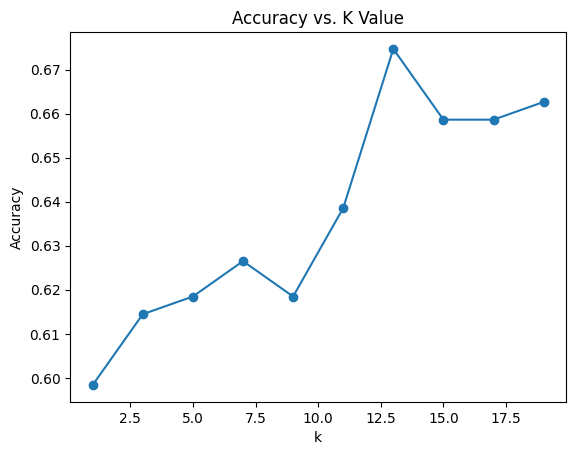

In [28]:
k_values = list(range(1, 21,2))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7469879518072289
Confusion Matrix:
 [[98 26]
 [37 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       124
           1       0.77      0.70      0.74       125

    accuracy                           0.75       249
   macro avg       0.75      0.75      0.75       249
weighted avg       0.75      0.75      0.75       249



In [30]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.714859437751004
F1 Score (weighted): 0.7136033322698844

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73       124
           1       0.75      0.65      0.70       125

    accuracy                           0.71       249
   macro avg       0.72      0.72      0.71       249
weighted avg       0.72      0.71      0.71       249

Confusion Matrix:
 [[97 27]
 [44 81]]


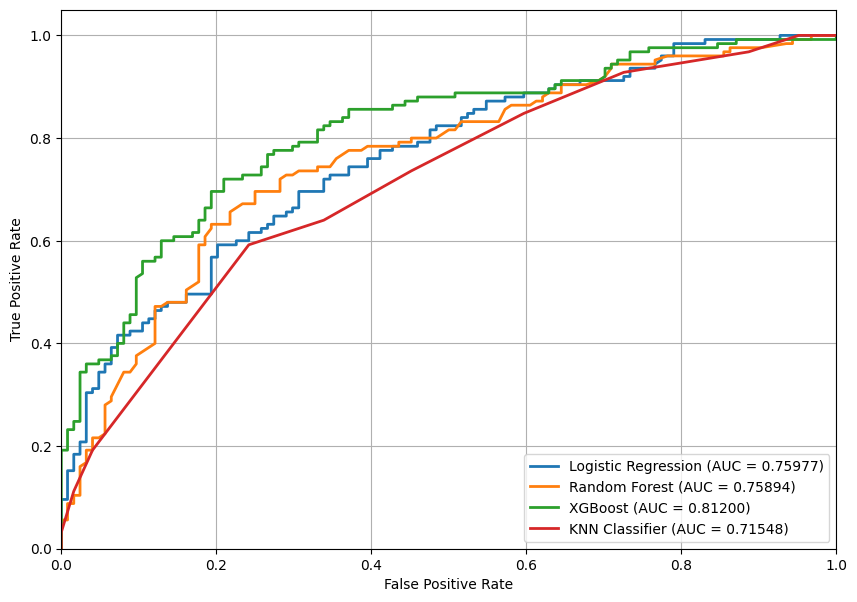

In [31]:
model_probs_dict = {
    "Logistic Regression": y_prob_lr,
    "Random Forest": y_prob_rf,
    "XGBoost": y_prob_xgb,
    "KNN Classifier": y_prob_knn
}
plt.figure(figsize=(10, 7))
    
for model_name, y_prob in model_probs_dict.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.5f})")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

In [32]:
joblib.dump(xgb, "classification_model.pkl")

['classification_model.pkl']